In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

конфигурации

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

RSEED = 42

## Подготовка данных

загружаем датасет

In [ ]:
df = pd.read_csv("churn_dataset.csv")

print(f"dataset shape: {df.shape}")

dataset shape: (100000, 100)


In [ ]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [ ]:
df.tail()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.666667,0.0,73.316667,0.0,2.000000,54.666667,45.333333,0.0,0.0,1,25,1,1,U,B,N,3771,9534.0,1594.83,1561.14,9494.0,3751,74.34,452.10,178.62,410,121,73,603.0,159.0,100.0,U,LOS ANGELES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,O,15.0,S,M,5.0,M,4.0,2.0,NaN,A,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.0,1.000000,0.0,12.333333,0.0,69.333333,0.000000,15.333333,0.0,53.333333,0.000000,0.000000,0.000000,0.000000,9.000000,0.333333,100.760000,0.000000,21.413333,6.666667,14.893333,0.000000,0.000000,60.333333,0.000000,121.790000,0.000000,1.000000,0.0,0.383333,0.0,4.000000,69.333333,53.333333,0.0,0.0,0,27,1,1,U,CY,Y,3675,8887.0,1517.10,1451.85,8805.0,3629,72.59,440.25,181.45,382,126,73,410.0,143.0,69.0,S,LOS ANGELES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,O,9.0,S,M,3.0,M,7.0,2.0,I,A,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,31,1,1,U,DA,N,1271,9336.0,1114.91,1055.93,9234.0,1238,55.58,486.00,65.16,662,85,61,712.0,88.0,72.0,U,SOUTHWEST AREA,Y,N,199.98999,2.0,2.0,WCMB,0.0,0.0,NaN,NaN,NaN,B,1.0,M,9.0,NaN,NaN,NaN,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.666667,0.0,0.666667,0.0,117.333333,0.0,550.666667,0.333333,327.000000,0.0,417.000000,0.333333,1.333333,1.333333,0.106667,235.333333,1.000000,564.233333,1.656667,330.890000,55.000000,62.896667,16.666667,32.883333,442.333333,0.333333,641.230000,1.656667,167.333333,0.0,253.893333,0.0,19.333333,551.000000,417.333333,0.0,0.0,0,25,1,1,U,EA,N,10082,20784.0,2669.20,2593.26,20488.0,9921,123.49,975.62,472.43,1031,450,148,943.0,433.0,165.0,U,SOUTHWEST AREA,Y,N,149.98999,7.0,5.0,WCMB,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,S,U,U,U,U,U,N,75.0,1099999
99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.666667,0.0,0.666667,0.0,19.333333,0.0,155.666667,0.000000,1.333333,0.0,130.000000,0.000000,0.666667,0.666667,0.183333,1.333333,3.666667,164.436667,0.000000,0.000000,4.666667,7.110000,0.000000,0.000000,99.000000,0.000000,133.690000,0.000000,32.333333,0.0,30.746667,0.0,6.333333,155.666667,130.000000,0.0,0.0,1,25,1,1,U,B,N,1303,2355.0,956.47,885.94,2225.0,1231,46.63,117.11,64.79,105,60,51,111.0,64.0,51.0,S,LOS ANGELES AREA,Y,N,149.98999,3.0,2.0,WCMB,0.0,0.0,NaN,2.0,S,A,2.0,M,4.0,NaN,NaN,A,0.0,H,U,U,U,U,U,N,5.0,1100000


видно, что имеются пропущенные значения в некоторых ячейках. Рассмотрим более детально.

In [ ]:
df.isna().sum()

rev_Mean              357
mou_Mean              357
totmrc_Mean           357
da_Mean               357
ovrmou_Mean           357
ovrrev_Mean           357
vceovr_Mean           357
datovr_Mean           357
roam_Mean             357
change_mou            891
change_rev            891
drop_vce_Mean           0
drop_dat_Mean           0
blck_vce_Mean           0
blck_dat_Mean           0
unan_vce_Mean           0
unan_dat_Mean           0
plcd_vce_Mean           0
plcd_dat_Mean           0
recv_vce_Mean           0
recv_sms_Mean           0
comp_vce_Mean           0
comp_dat_Mean           0
custcare_Mean           0
ccrndmou_Mean           0
cc_mou_Mean             0
inonemin_Mean           0
threeway_Mean           0
mou_cvce_Mean           0
mou_cdat_Mean           0
mou_rvce_Mean           0
owylis_vce_Mean         0
mouowylisv_Mean         0
iwylis_vce_Mean         0
mouiwylisv_Mean         0
peak_vce_Mean           0
peak_dat_Mean           0
mou_peav_Mean           0
mou_pead_Mea

* Нет пропусков целевой переменной churn.
* В некоторых признаков много пропущенных значений (25-50%). В дальнейшем посмотрим, насколько они влияют на отток пользователей.
* некоторые признаки имеют не слишком много пропусков (1-3%), попробуем в дальнейшем заполнить их 

In [ ]:
df_na_sum = df.isna().sum()
feature_missing_values = df_na_sum.where(df_na_sum > 3000).dropna()
feature_missing_values

prizm_social_one     7388.0
hnd_webcap          10189.0
ownrent             33706.0
lor                 30190.0
dwlltype            31909.0
adults              23019.0
infobase            22079.0
income              25436.0
numbcars            49366.0
HHstatin            37923.0
dwllsize            38308.0
dtype: float64

In [ ]:
# количество пропущенных значений
df.isna().sum().sum()

342969

## Предварительный анализ данных

Целевая переменная отток пользователя - churn. Посмотрим на процент оттока всех пользователей.

In [ ]:
print(f"Процент оттока пользователей: {df['churn'].mean() * 100:.2f}%")

Процент оттока пользователей: 49.56%


классы сбалансированы

посмотрим, какие типы данных используются в датасете

In [ ]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

категориальные и числовые признаки

In [ ]:
categorical_features = []
numerical_features = []
for feature in df.columns:
    if df[feature].dtype == object:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

print(f"Количество категориальных признаков: {len(categorical_features)}")
print(f"Количество числовых признаков: {len(numerical_features)}")

Количество категориальных признаков: 21
Количество числовых признаков: 79


### Визуализация, Связи

Визуализируем отток для категориальных признаков и распределение этого признака с большим количеством пропущенных значений

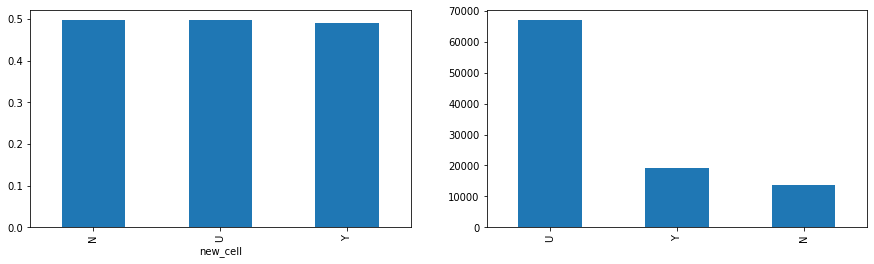

In [ ]:
def plot_cat_feature(feature, title=""):
    """Рисует графики  среднего оттока категориального признака
    и его распределение"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    mean_churn_srs = df[["churn", feature]].groupby(feature).mean()
    mean_churn_srs.plot.bar(legend=False, title=f"{title}", ax=axes[0]) # среднее значение оттока
    df[feature].value_counts().plot.bar(legend=False, ax=axes[1])  # распределение

plot_cat_feature("new_cell")

In [ ]:
for feature, miss in feature_missing_values.items():
    plot_cat_feature(feature, miss)

Следующие признаки имеют большое количество пропущенных значений, несбалансированы или не влияют на отток пользователей. Поэтому можно выбросить их.
* hnd_webcap
* ownrent
* lor
* dwlltype
* adults
* infobase
* income
* numbcars
* HHstatin
* dwllsize

In [ ]:
features_to_drop = ["hnd_webcap", "ownrent", "lor", "dwlltype", "adults",
                    "infobase", "income", "numbcars", "HHstatin", "dwllsize"]

Рассмотрим оставшиеся категориальные признаки

In [ ]:
for feature in categorical_features:
    if feature not in feature_missing_values:
        plot_cat_feature(feature)

Категориальные признаки:

* Большинство признаков не сильно  влияют на отток пользователей
* Имеются несбалансированные признаки
* на отток сильнее всего влияют следующие признаки:
    * crclscod 
    * asl_flag
    * area
    * dualband
    * ethnic
* При наличии ребенка чем меньше лет ребенку, тем отток выше



Визуализируем отток для числового признака и распределение этого признака

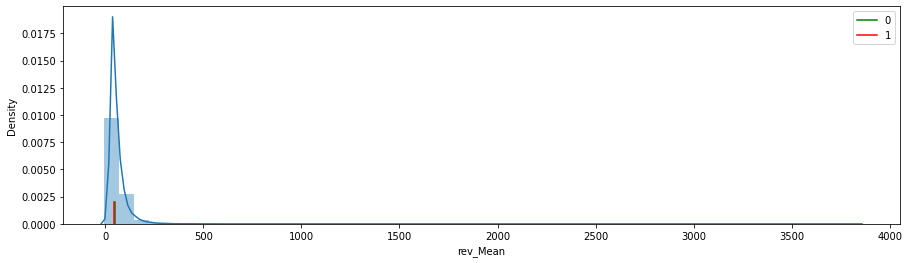

In [ ]:
def plot_num_feature(feature):
    fig, ax = plt.subplots(figsize=(15, 4))
    feature_median = df[["churn", feature]].groupby("churn").median().values.flatten()
    sns.distplot(df[feature], ax=ax)  # распределение
    ax.axvline(feature_median[0], ymax=0.1, label='0', linestyle='-', color='g')
    ax.axvline(feature_median[1], ymax=0.1, label='1', linestyle='-', color='r')
    plt.legend()

plot_num_feature("rev_Mean")

churn


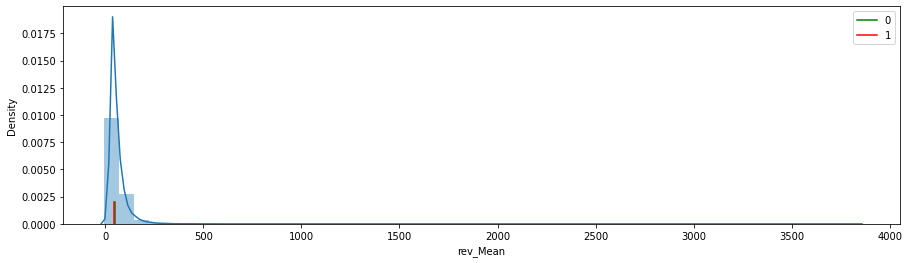

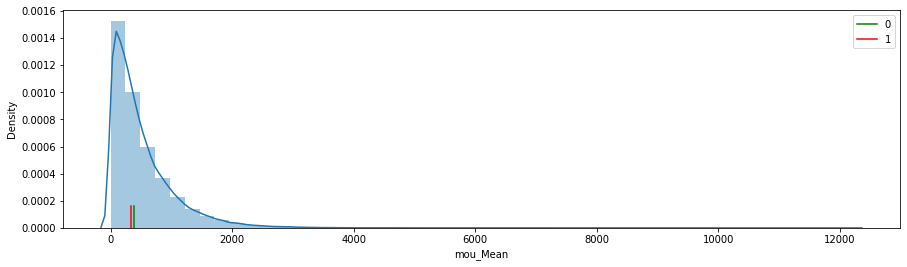

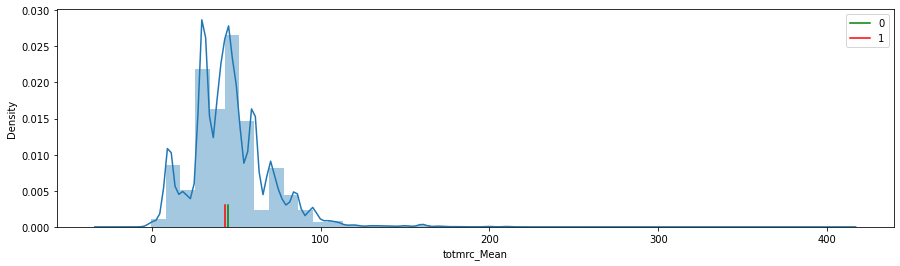

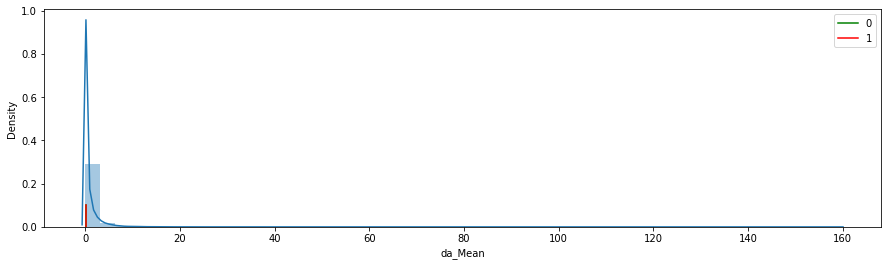

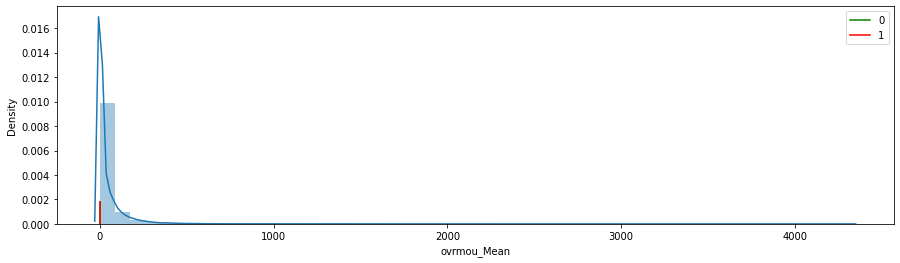

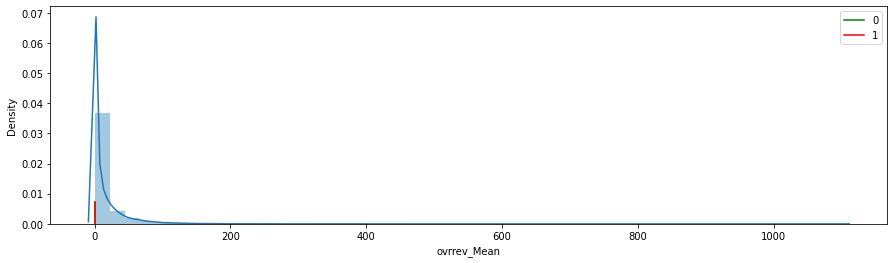

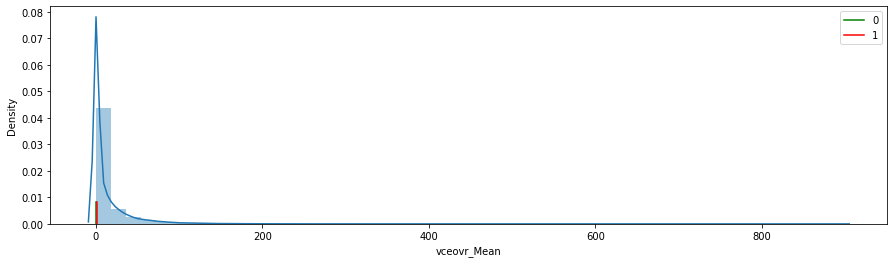

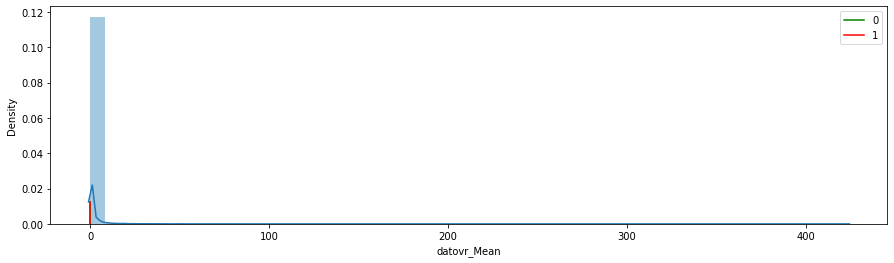

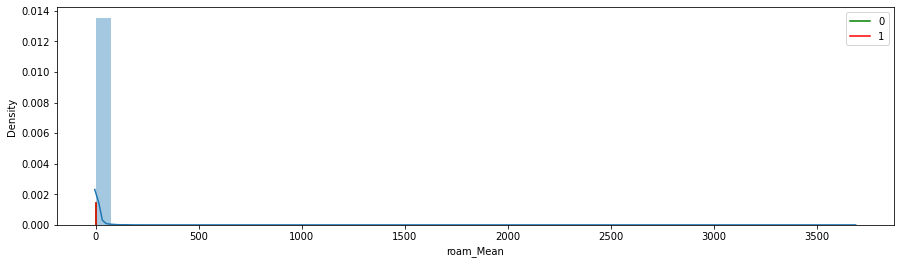

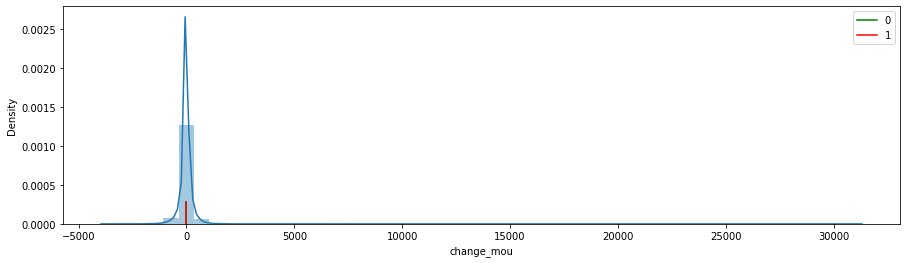

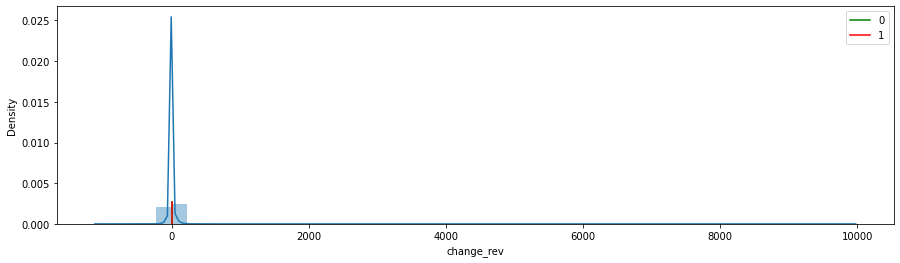

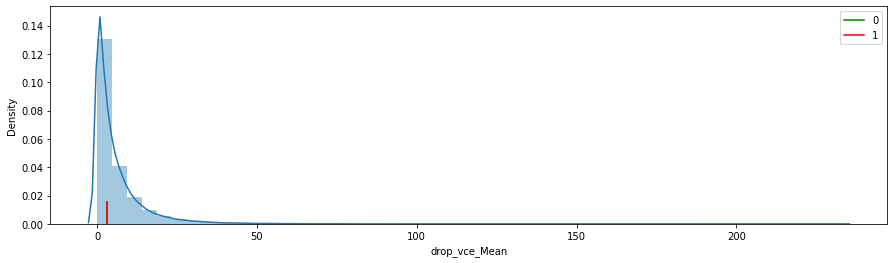

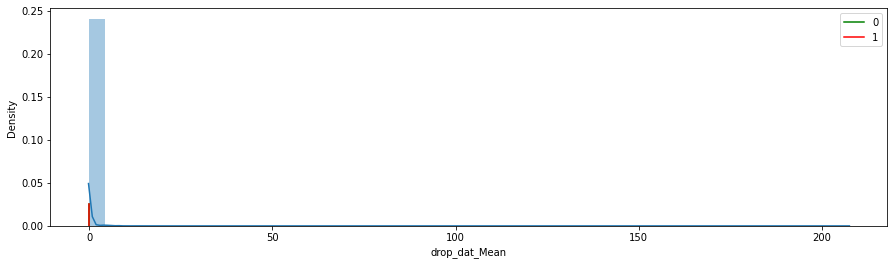

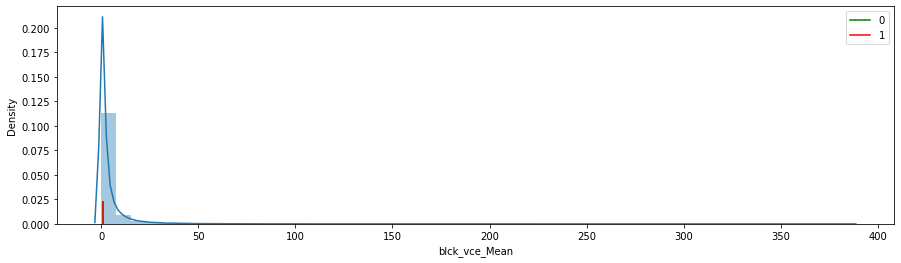

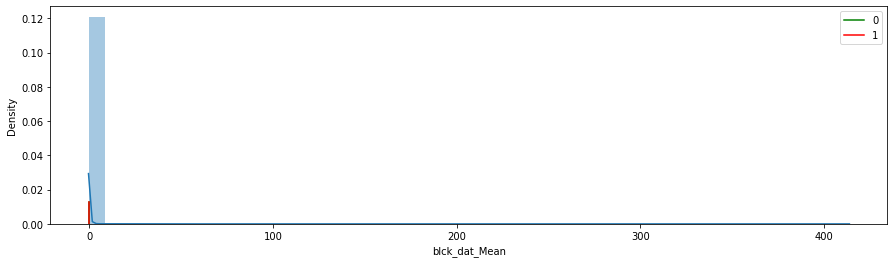

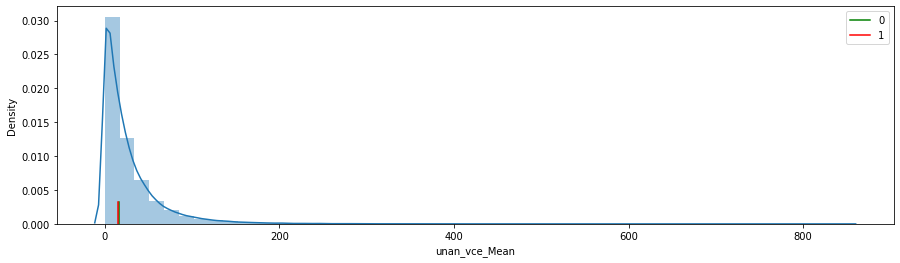

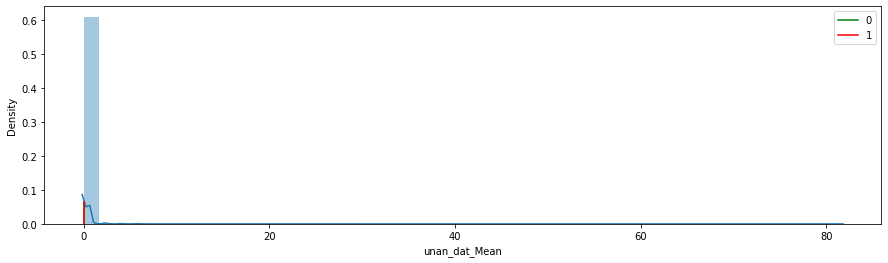

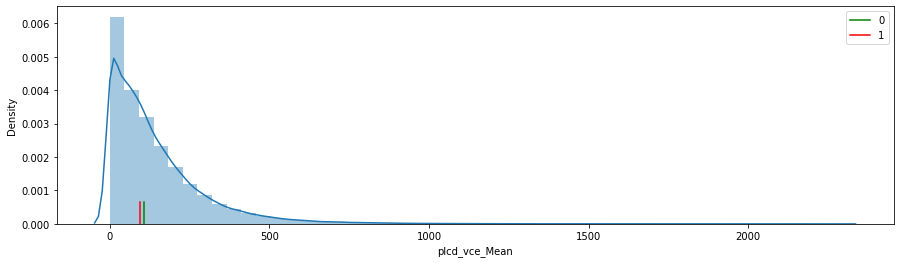

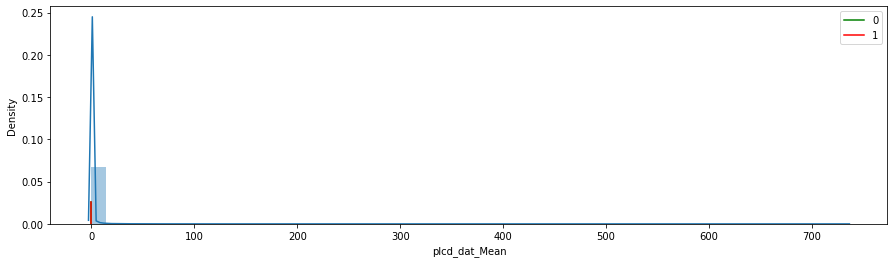

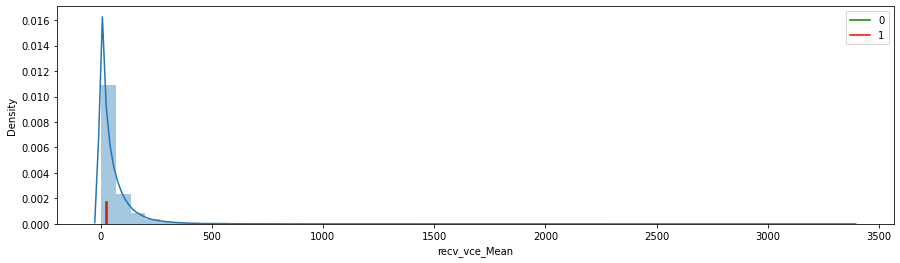

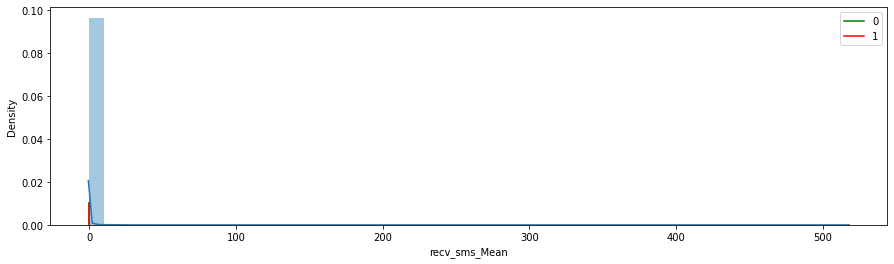

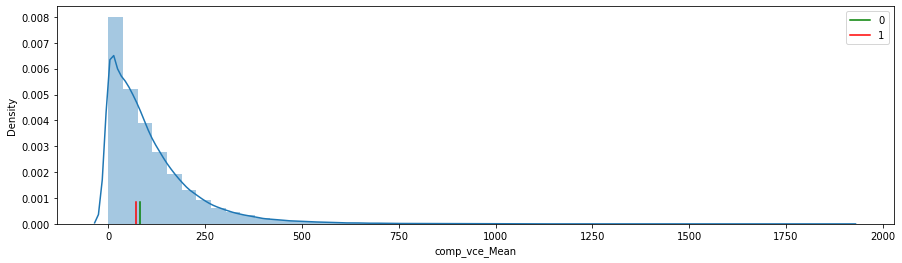

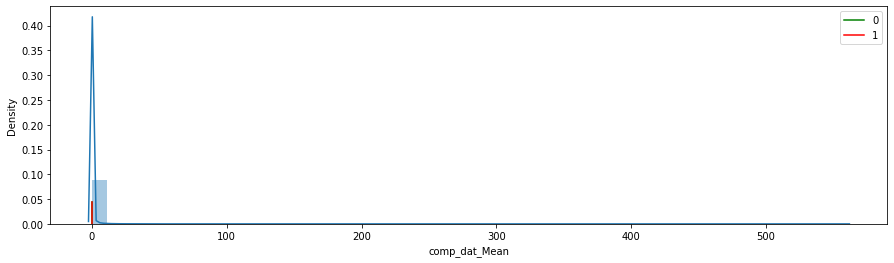

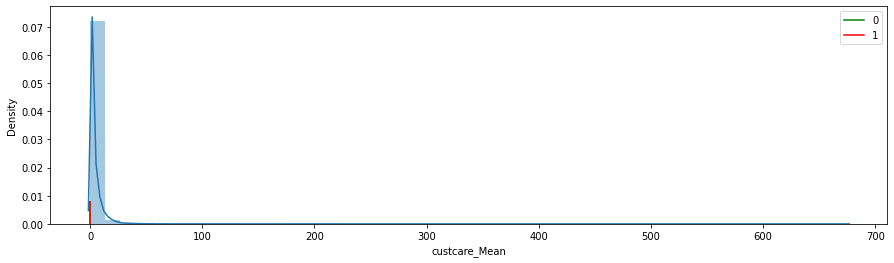

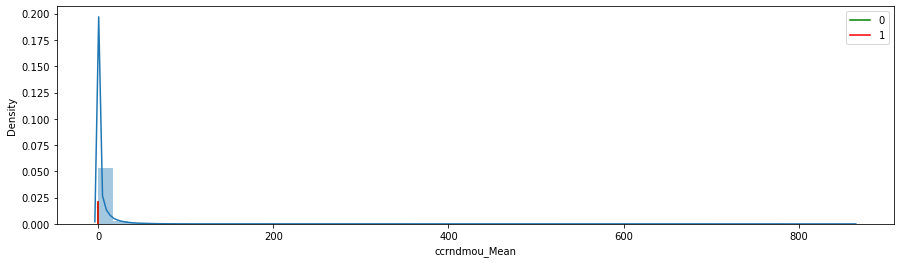

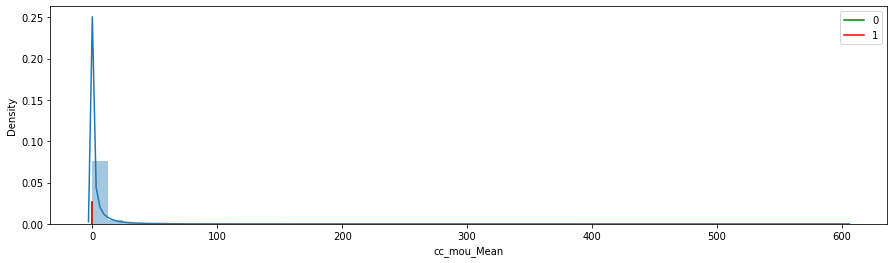

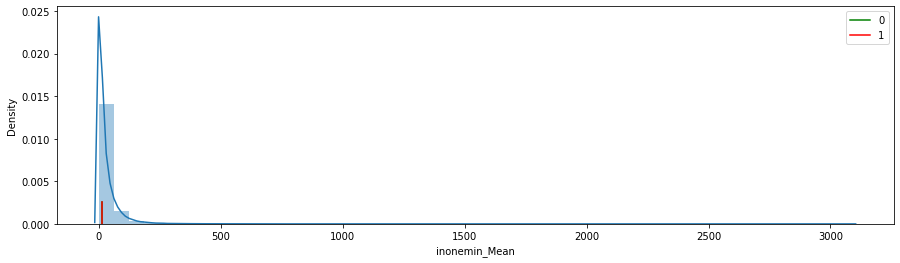

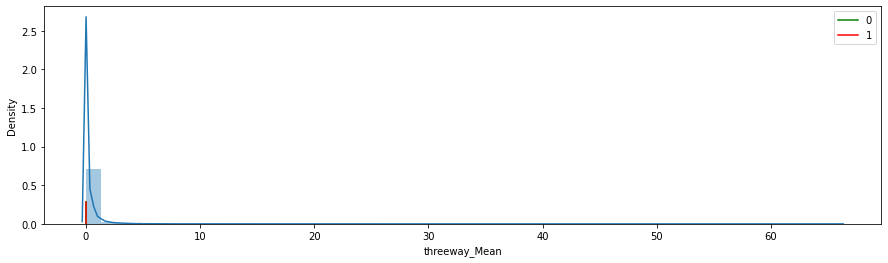

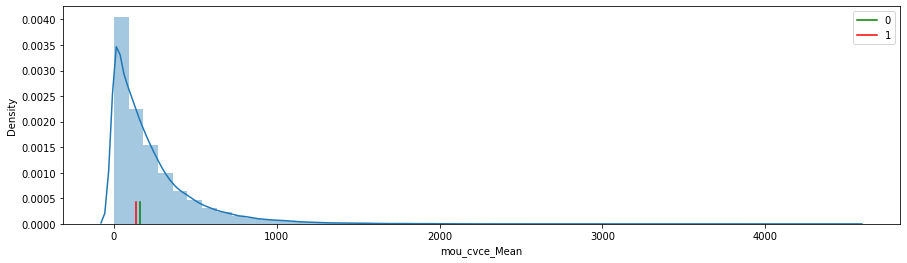

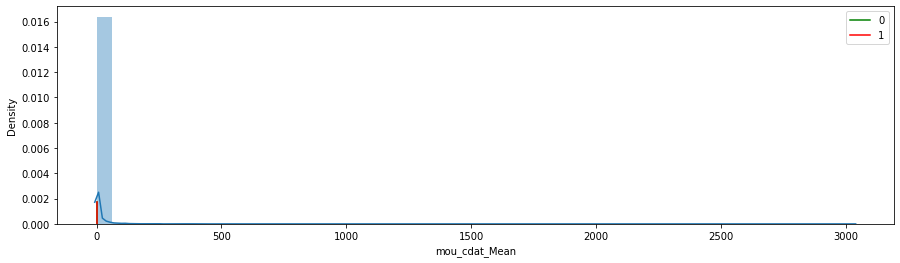

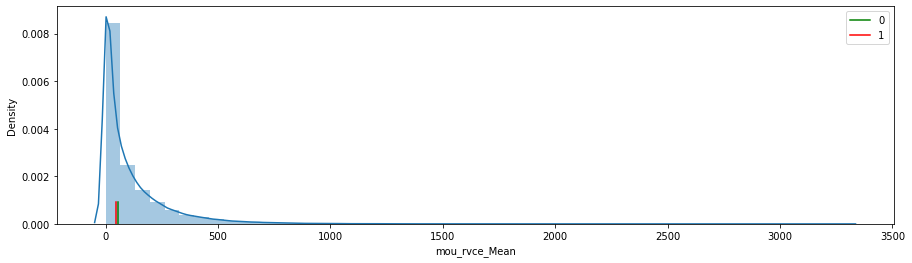

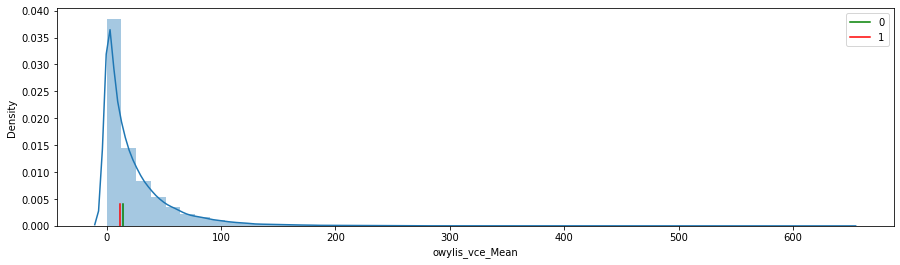

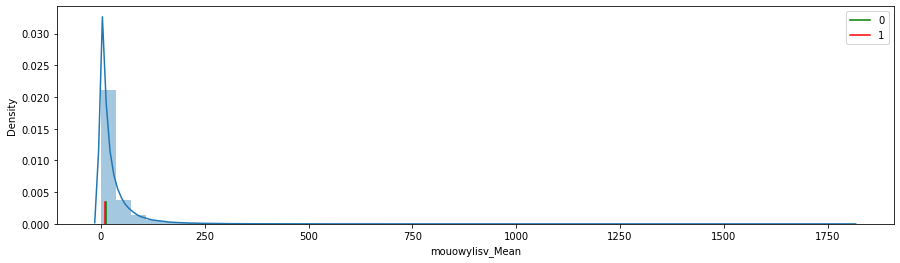

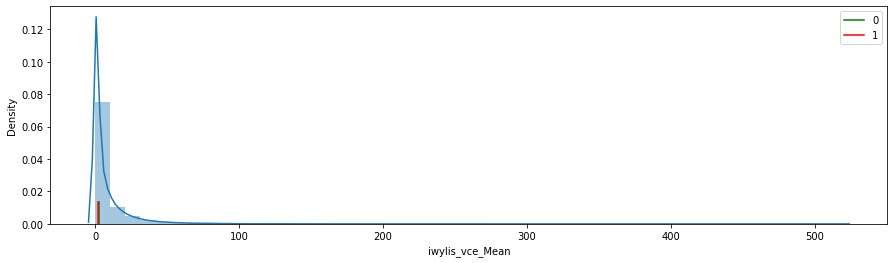

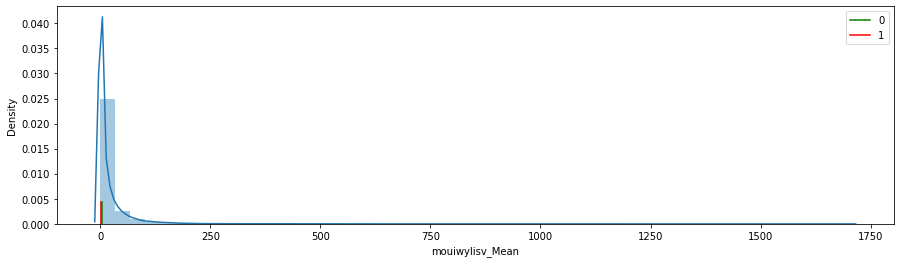

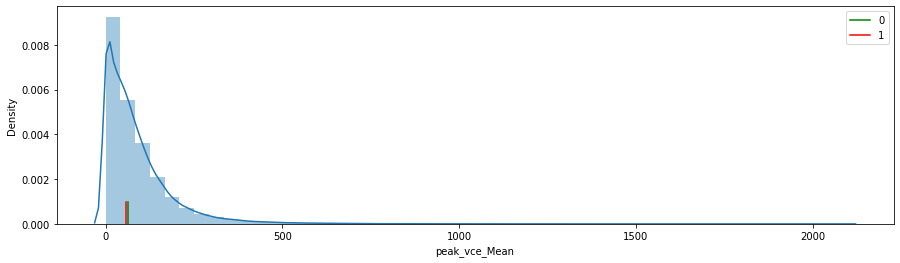

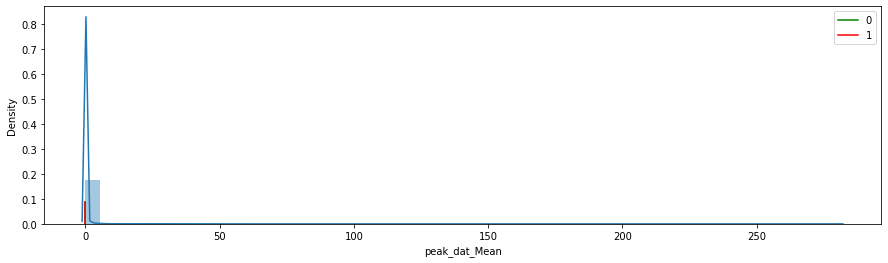

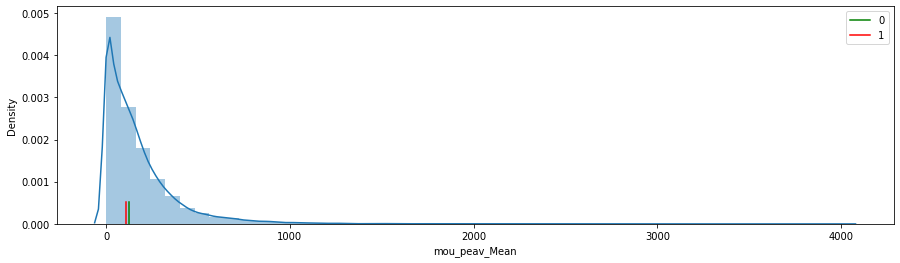

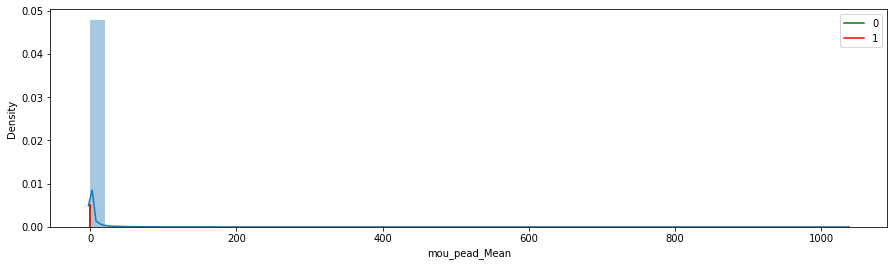

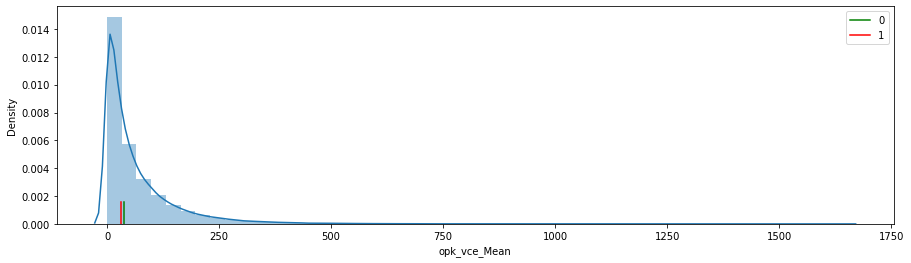

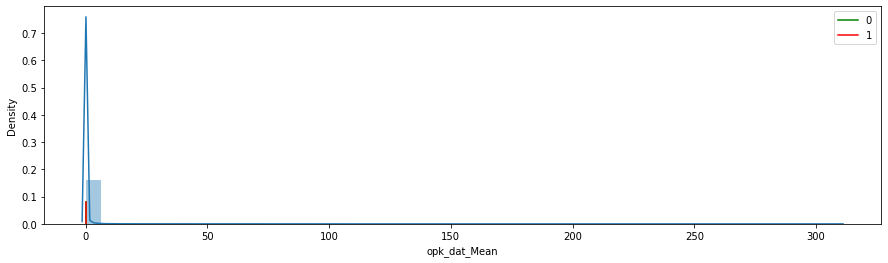

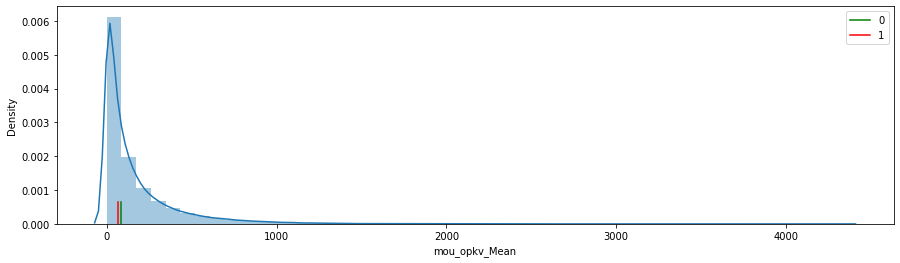

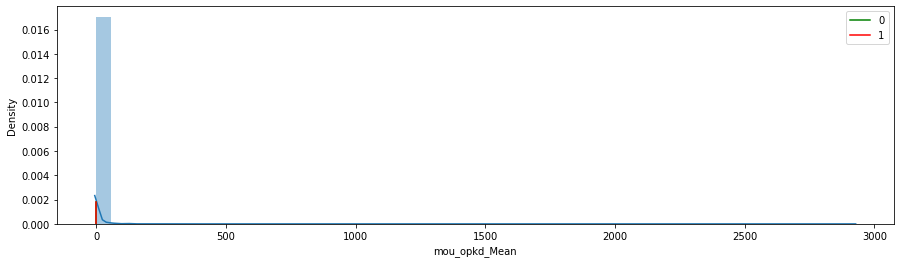

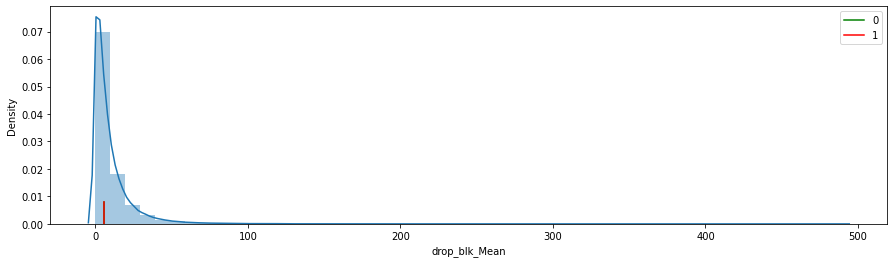

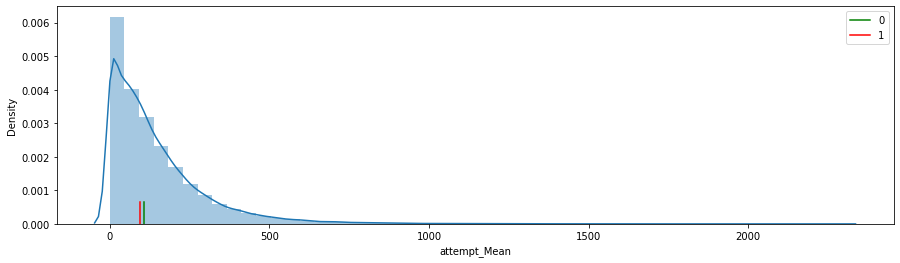

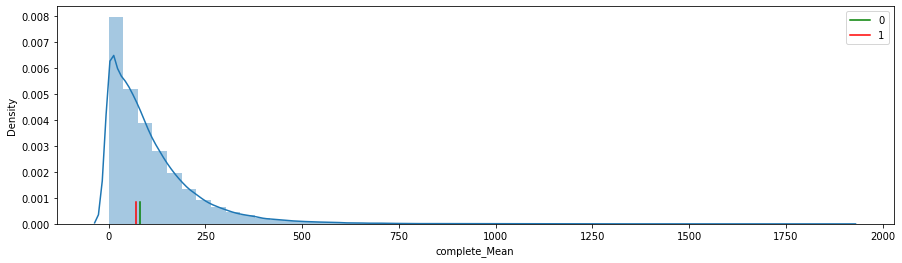

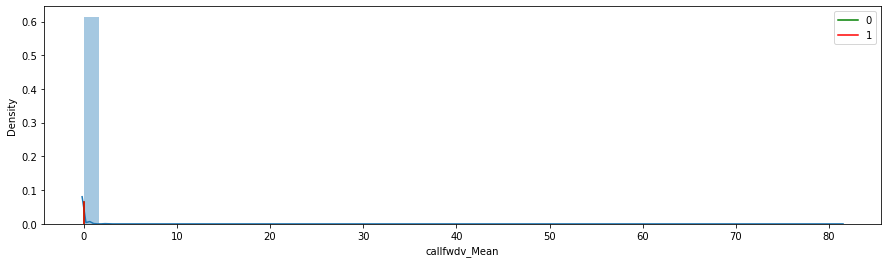

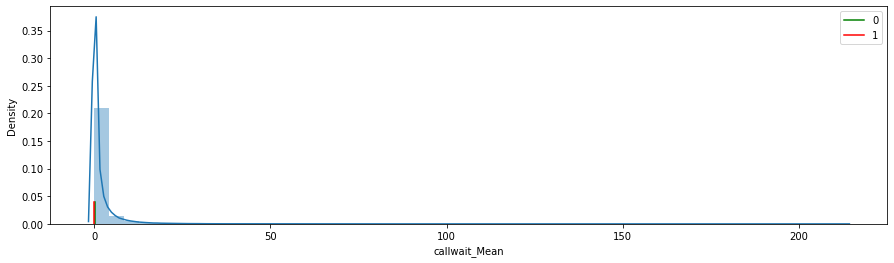

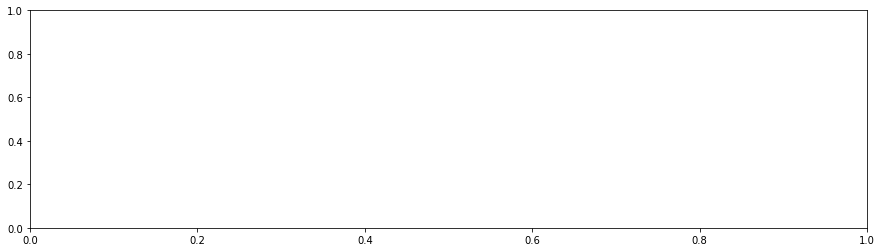

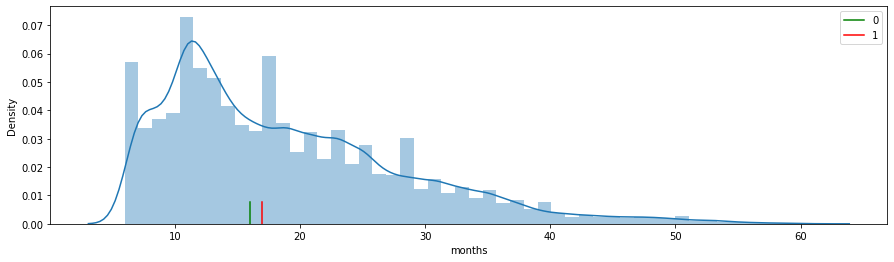

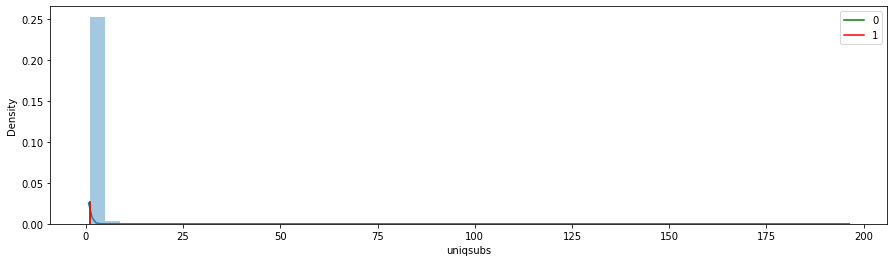

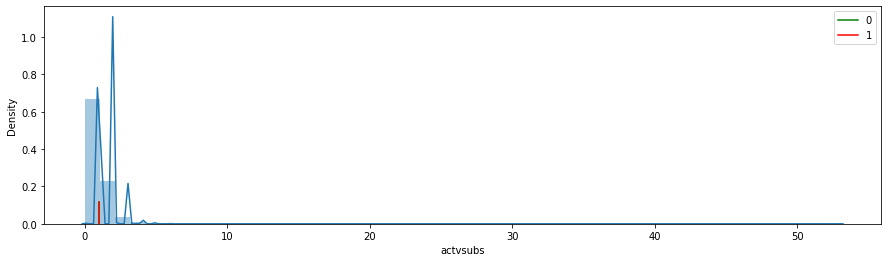

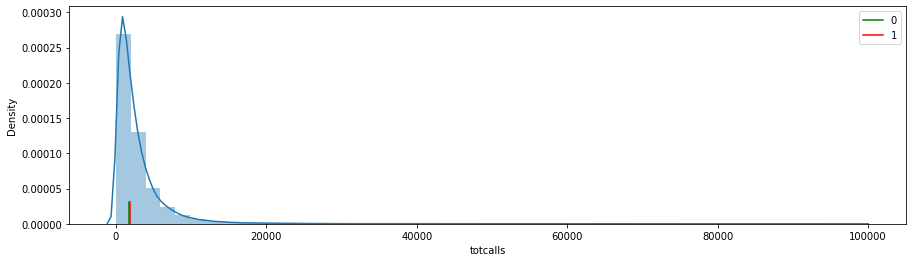

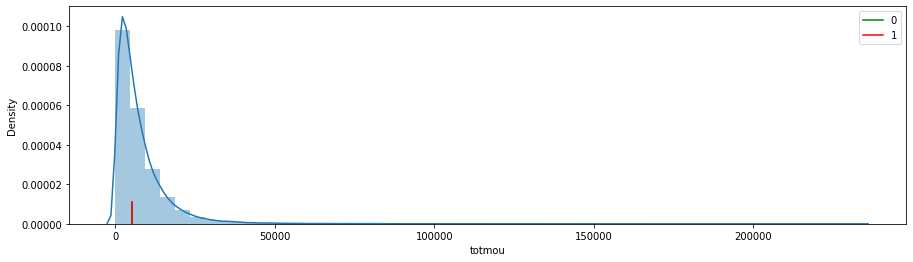

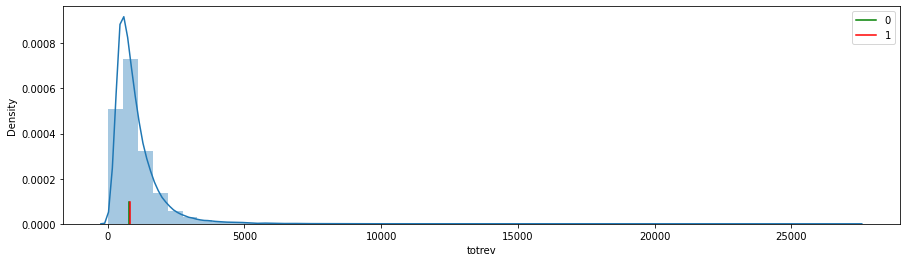

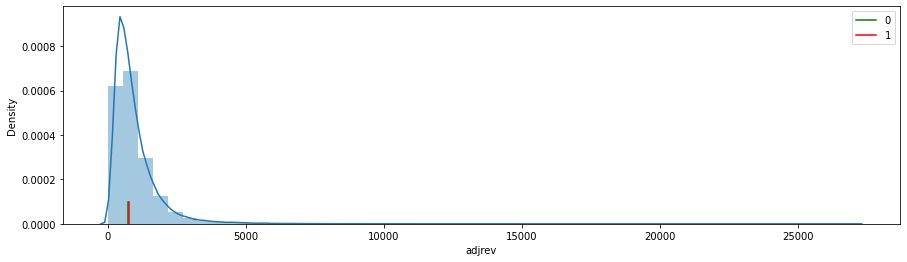

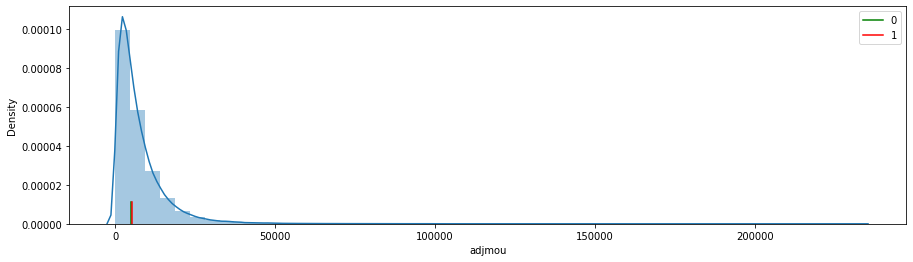

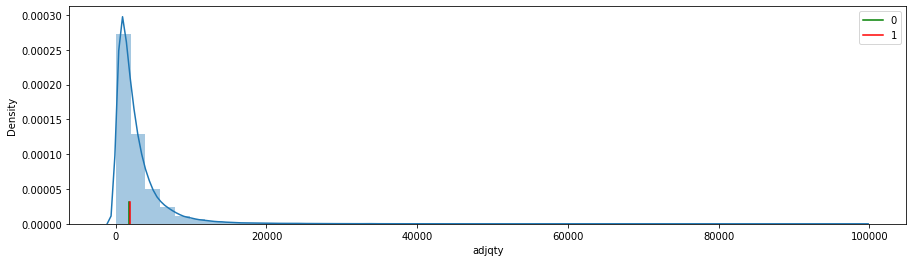

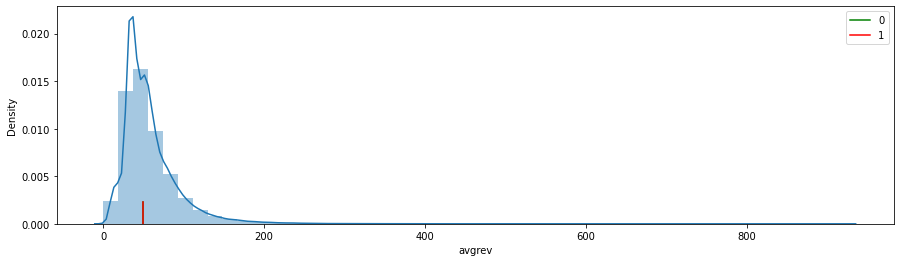

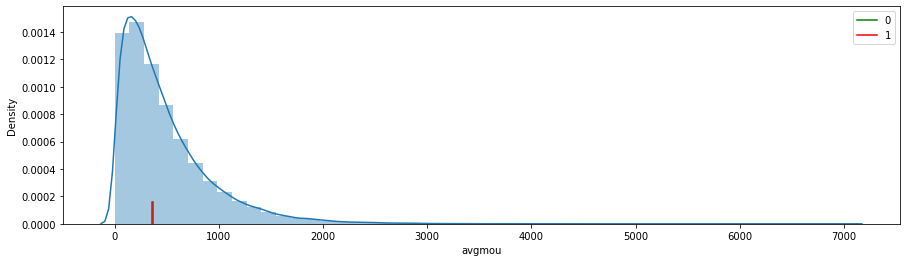

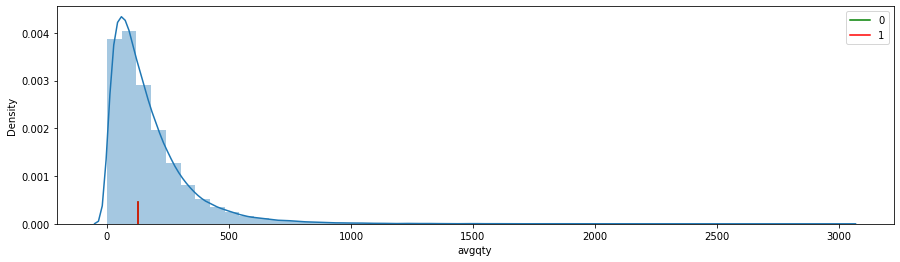

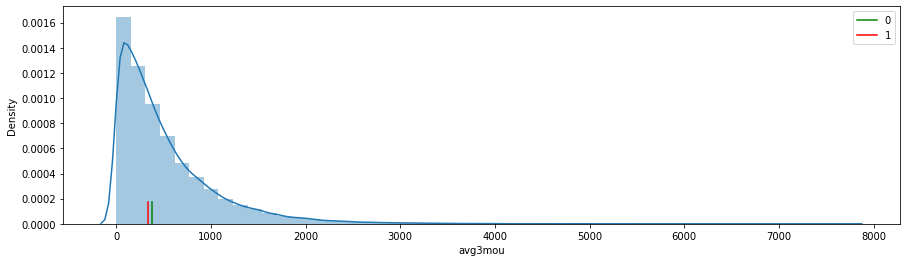

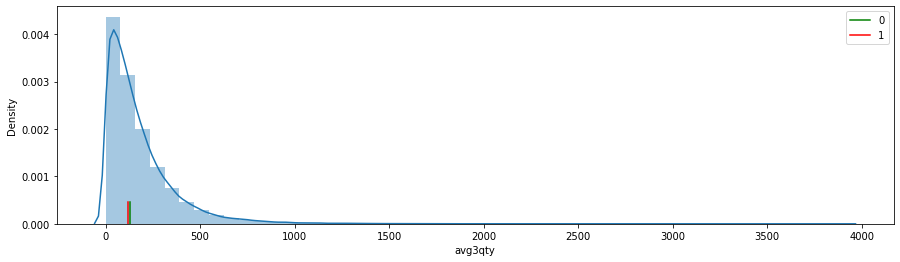

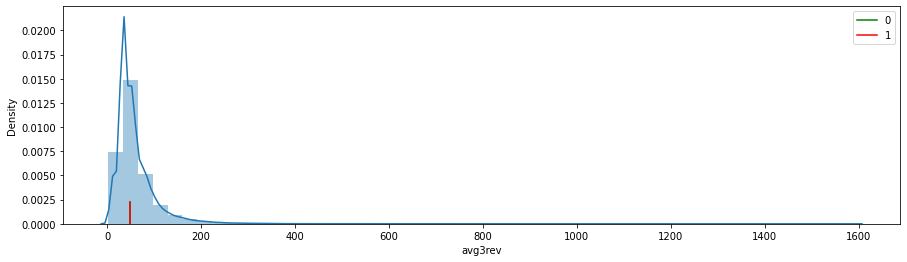

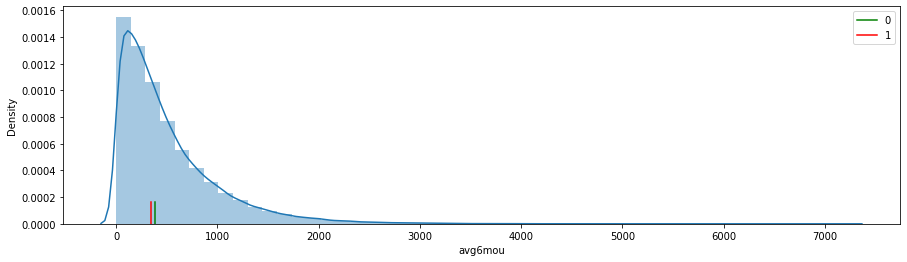

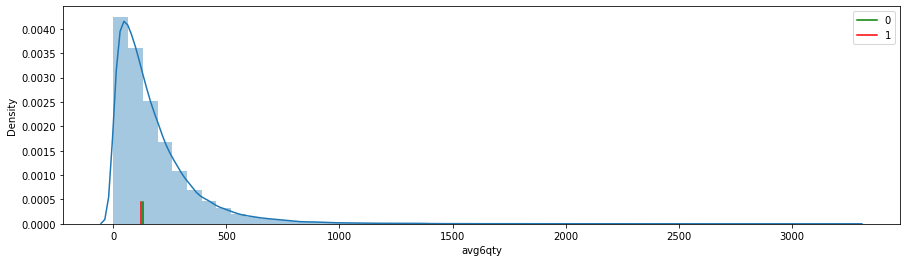

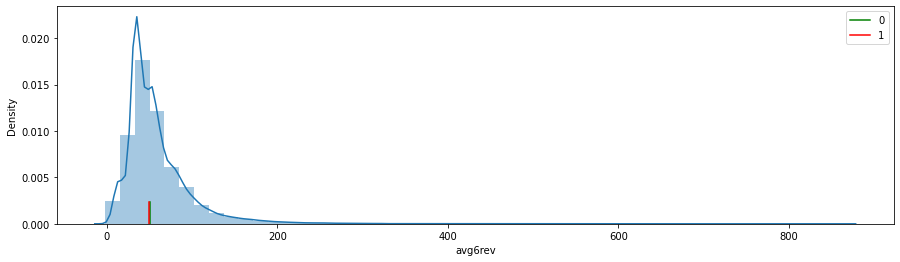

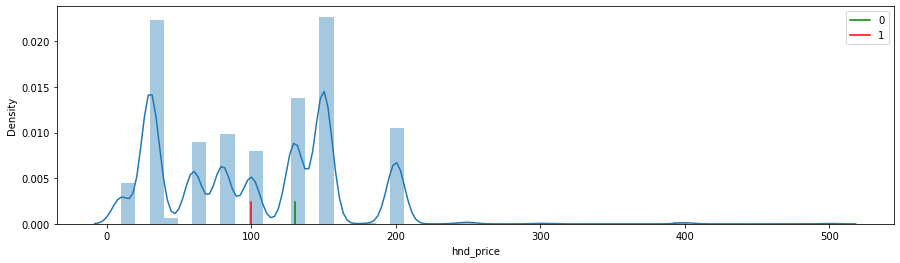

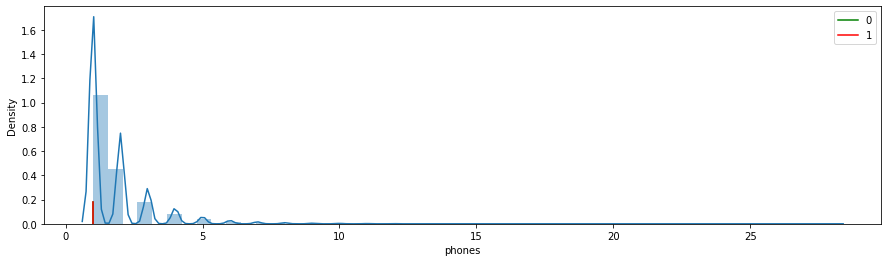

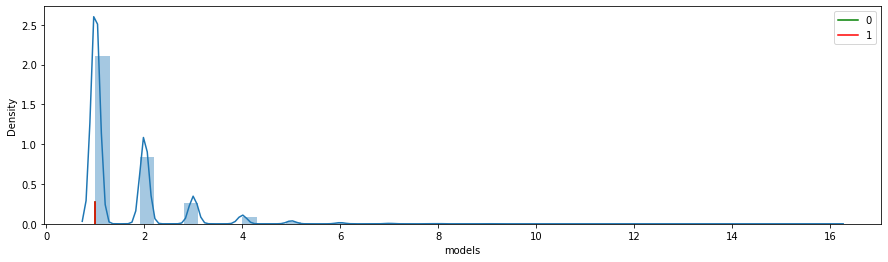

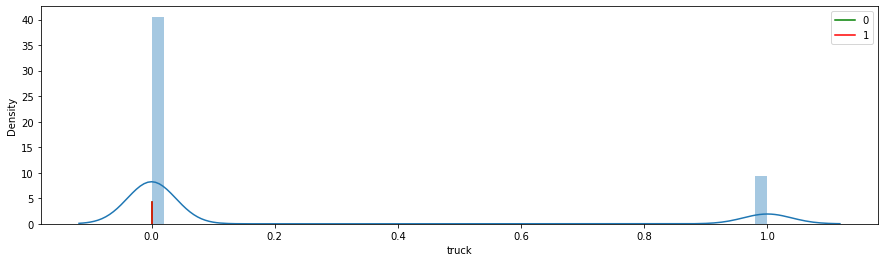

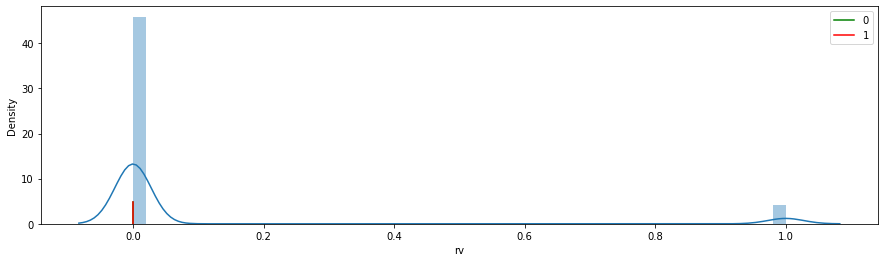

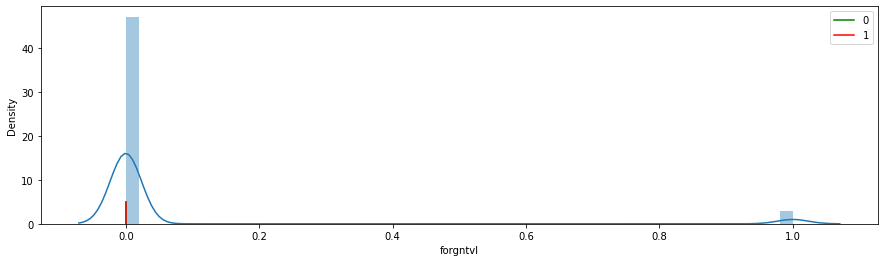

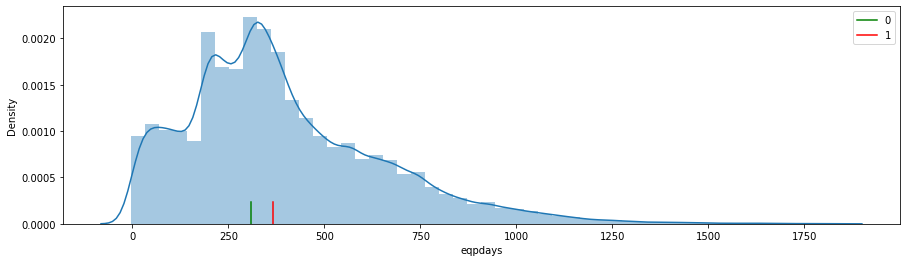

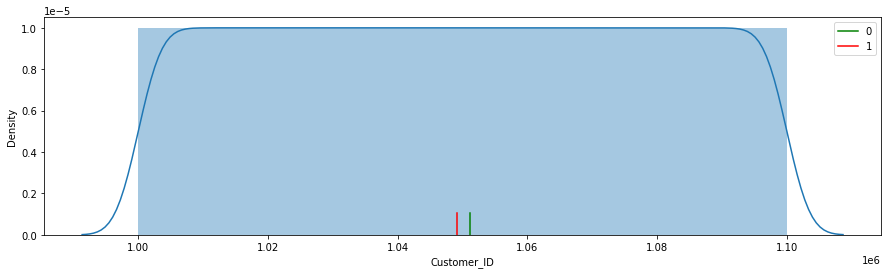

In [ ]:
for feature in numerical_features:
    if feature not in feature_missing_values:
        try:
            plot_num_feature(feature)
        except:
            print(feature)
            continue

Числовые признаки:

* Медианное значение для большинства признаков не сильно зависит от оттока / не оттока пользователей
* Признаки, которые сильнее всего зависят от оттока/ не оттока:
    *
    * plcd_vce_Mean
    * comp_vce_Mean
    * mou_cvce_Mean
    * months
    * hnd_price
    * eqpdays



## Обработка данных

### удаляем признаки

удалим признаки, которые несильно влиют на отток пользователей, несбалансированы или имеют много пропущенных значений

In [ ]:
df_clean = df.drop("Customer_ID", axis=1)
df_clean = df_clean.drop(features_to_drop, axis=1)

print(f"количество пропущенных значений: {df_clean.isna().sum().sum()}")

количество пропущенных значений: 40844


### заполняем пропущенные значения

Для числовых признаков заполним пропущенные значения медианным значением признака, для категориальных - модой, сгруппировав по оттоку.

In [ ]:
for feature in df_clean.columns:
    if df_clean[feature].isna().sum() != 0:
        if df_clean[feature].dtype == object:
            feature_churn_m = df_clean[["churn", feature]].groupby("churn").agg(pd.Series.mode).values.flatten()
        else:
            feature_churn_m = df_clean[["churn", feature]].groupby("churn").median().values.flatten()
        c1 = df_clean[df_clean["churn"] == 0][feature].fillna(feature_churn_m[0])
        c2 = df_clean[df_clean["churn"] == 1][feature].fillna(feature_churn_m[1])
        df_clean[feature] = pd.concat((c1, c2)).sort_index()

print(f"количество пропущенных значений: {df_clean.isna().sum().sum()}")

количество пропущенных значений: 0


### Преобразуем данные

рассмотрим уникальные значения категориальных признаков

In [ ]:
for feature in df_clean.columns:
    if df_clean[feature].dtype == object:
        print(f"{feature}: {df_clean[feature].unique()}")

new_cell: ['U' 'N' 'Y']
crclscod: ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
asl_flag: ['N' 'Y']
prizm_social_one: ['S' 'U' 'T' 'C' nan 'R']
area: ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' nan 'LOS ANGELES AREA']
dualband: ['Y' 'N' 'T' 'U' nan]
refurb_new: ['N' 'R' nan]
hnd_webcap: ['WCMB' 'WC' nan 'UNKW']
ownrent: ['O' nan 'R']
dwlltype: ['S' 'M' nan]
marital: ['S' 'M' 'A' 'U' 'B' nan]
infobase: ['M' nan 'N']
HHstatin: ['C' 'I' nan 'B' 'A' 'G' 'H']
dwllsize: 

рассмотрим бинарные признаки (да / нет). Преобразуем "да" - 1, "нет" - 0

In [ ]:
binary_features = []
nonbinary_features = []
for feature in df_clean.columns:
    if df_clean[feature].dtype == object:
        values = df_clean[feature].unique()
        if len(values) <= 2:
            binary_features.append(feature)
            print(f"{feature}: {values}")
        else:
            nonbinary_features.append(feature)

new_cell: ['U' 'N' 'Y']
asl_flag: ['N' 'Y']
refurb_new: ['N' 'R' nan]
ownrent: ['O' nan 'R']
dwlltype: ['S' 'M' nan]
infobase: ['M' nan 'N']
kid0_2: ['U' 'Y' nan]
kid3_5: ['U' 'Y' nan]
kid6_10: ['U' 'Y' nan]
kid11_15: ['U' 'Y' nan]
kid16_17: ['U' 'Y' nan]
creditcd: ['Y' 'N' nan]


refurb_new имеет значения 'N' и 'R', где 'N' - new, 'R' - refurb. Поэтому будет некорректно вносить данный признак в бинарные да/нет признаки

In [ ]:
binary_features.remove("refurb_new")
nonbinary_features.append("refurb_new")

In [ ]:
for binary_feature in binary_features:
    df_clean[binary_feature].replace({"N": 0, "Y": 1, "U": 0}, inplace=True)

In [ ]:
df_clean[binary_features].head()

,new_cell,asl_flag,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0.0,0.0,0.0,0.0,0.0,1.0


изменим категориальные признаки на one-hot encoding.

In [ ]:
df_dummies = pd.get_dummies(df_clean, columns=nonbinary_features)
df_dummies.shape

(100000, 223)

In [ ]:
df_dummies.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C,crclscod_C2,crclscod_C5,crclscod_CA,crclscod_CC,crclscod_CY,crclscod_D,crclscod_D2,crclscod_D4,crclscod_D5,crclscod_DA,crclscod_E,crclscod_E2,crclscod_E4,crclscod_EA,crclscod_EC,crclscod_EF,crclscod_EM,crclscod_G,crclscod_GA,crclscod_GY,crclscod_H,crclscod_I,crclscod_IF,crclscod_J,crclscod_JF,crclscod_K,crclscod_L,crclscod_M,crclscod_O,crclscod_P1,crclscod_S,crclscod_TP,crclscod_U,crclscod_U1,crclscod_V,crclscod_V1,crclscod_W,crclscod_Y,crclscod_Z,crclscod_Z1,crclscod_Z2,crclscod_Z4,crclscod_Z5,crclscod_ZA,crclscod_ZF,crclscod_ZY,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_U,dualband_Y,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,refurb_new_N,refurb_new_R,ownrent_O,ownrent_R,dwlltype_M,dwlltype_S,infobase_0,infobase_M
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,0,0,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,361.0,1000001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,0,0,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.

посмотрим, остались ли признаки с типом объект

In [ ]:
set(df_dummies.dtypes)

{dtype('uint8'), dtype('int64'), dtype('float64')}

## Построение модели

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [ ]:
y = df_dummies["churn"]
X = df_dummies.drop("churn", axis=1)
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (100000, 222)
y shape: (100000,)


разделим на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [ ]:
def print_metrics_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)                            
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"accuracy:\t{acc:.4f}\nprecision:\t{pre:.4f}\nrecall: \t{rec:.4f}\nf1-score:\t{f1:.4f}")

In [ ]:
def train_test(model, cm_plot=True):
    # evaluation
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    print("Test:")
    print_metrics_score(y_test, y_pred_test)
    print("Train:")
    y_pred_train = model.predict(X_train)
    print_metrics_score(y_train, y_pred_train)


    if not cm_plot:
        return
    # confusion matrix на тестовой выборке
    cm = confusion_matrix(y_test, y_pred_test)
    cmd = ConfusionMatrixDisplay(cm, display_labels=["non-churn", "churn"])
    fig, ax = plt.subplots(figsize=(10,10))
    cmd.plot(ax=ax, cmap=plt.cm.Blues)

### LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
train_test(lr, cm_plot=False)

переобучения нет

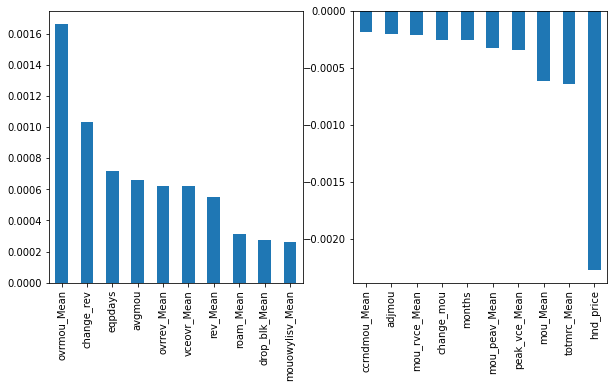

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
weights = pd.Series(lr.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot.bar(ax=axes[0])
weights.sort_values(ascending = False)[-10:].plot.bar(ax=axes[1])

Точность модели логистической регрессии слишком мала, чтобы с уверенностью делать какие-либо выводы. 

Однако заметим, что

Признаки, с увеличением которых, снижается отток пользователей:
* hnd_price
* totmrc_Mean
* mou_Mean

Увеличивается:
* ovrmou_Mean
* change_rev
* eqpdays
* ovrrev_Mean
* vceovr_Mean
* rev_Mean

### KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10) 

In [ ]:
train_test(knn)

Видно переобучение модели и низкий показатель recall, т.е. модель не способна находить отток пользователей.

### RandomForestClassifier

In [ ]:
param_grid_rf = {
    "n_estimators": [500, 700],
    "max_depth": [25, 35],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [2, 5]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

In [ ]:
print(f"лучшие оценки: {rf_grid.best_score_}")
print(f"лучшие параметры: {rf_grid.best_params_}")

In [ ]:
rf_best = RandomForestClassifier(
    n_estimators=500, random_state=RSEED,
    max_leaf_nodes = 30)

Test:
accuracy:	0.6029
precision:	0.5929
recall: 	0.6516
f1-score:	0.6020
Train:
accuracy:	0.6145
precision:	0.5995
recall: 	0.6622
f1-score:	0.6137


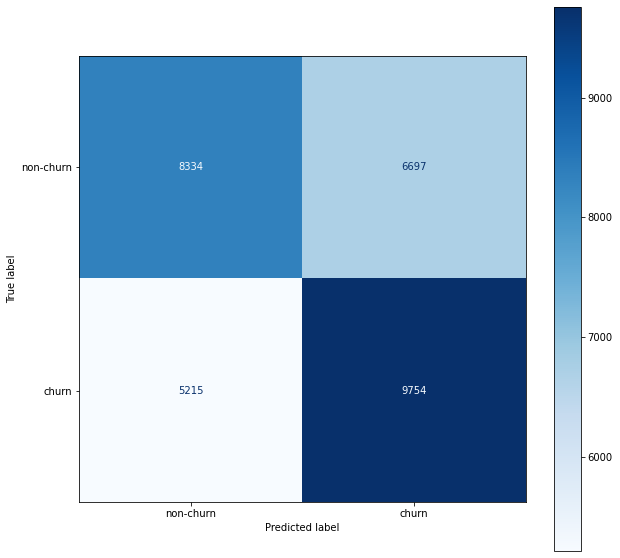

In [ ]:
eval(rf_best)

переобучения не наблюдается

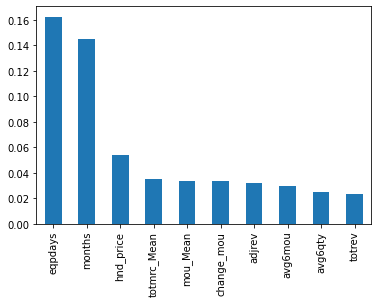

In [ ]:
importances = rf_best.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values(ascending=False)[:10].plot.bar()

Признаки, имеющие наибольшее влияние на отток пользователей:
* eqpdays
* months
* hnd_price

Можем заметить, что имеются пересечения признаков, на которые акцентируют внимание обе модели (в разной степени): eqpdays, hnd_price. Но, учитывая лучшую показатели метрик модели случайного леса, считаем, что те признаки, на которые опирается данная модель, более важны. 

### LGBM

In [ ]:
param_grid = {
    "n_estimators": [500, 700],
    "max_depth": [25, 35],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [2, 5]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

In [ ]:
param_grid_lgbm = {
    "learning_rate": [0.05, 0.1],
    "num_trees": [100, 200],
    "num_leaves": [31, 63],
    "boosting_type" : ["gbdt", "dart"],
    "random_state" : [RSEED],
    "colsample_bytree" : [0.75, 0.8],
    "subsample" : [0.7, 0.75],
    "reg_alpha" : [1.2, 1.4],
    "reg_lambda" : [1.2, 1.4]
}

lgbm = lgb.LGBMClassifier(
    boosting_type= "gbdt",
    objective = "binary",
    n_jobs = -1,
    silent = True,
    metric="binary_logloss",
    metric_freq=1,
    max_bin=255,
    num_trees=200,
    learning_rate=0.1,
    num_leaves=63,
    tree_learner="serial",
    num_threads=8,
    feature_fraction=0.8,
    bagging_freq=5,
    min_data_in_leaf=50,
    min_sum_hessian_in_leaf=5.0
)

lgbm_grid = GridSearchCV(lgbm, param_grid_lgbm, cv=5, n_jobs=-1)
lgbm_grid.fit(X_train, y_train)

In [ ]:
print(f"лучшие оценки: {lgbm_grid.best_score_}")
print(f"лучшие параметры: {lgbm_grid.best_params_}")

In [ ]:
lgbm_best = lgb.LGBMClassifier(
    boosting_type= "gbdt",
    objective = "binary",
    n_jobs = -1,
    silent = True,
    metric="binary_logloss",
    metric_freq=1,
    max_bin=255,
    num_trees=200,
    learning_rate=0.1,
    num_leaves=63,
    tree_learner="serial",
    num_threads=8,
    feature_fraction=0.8,
    bagging_freq=5,
    min_data_in_leaf=50,
    min_sum_hessian_in_leaf=5.0
)

Test:
accuracy:	0.6524
precision:	0.6479
recall: 	0.6643
f1-score:	0.6524
Train:
accuracy:	0.7262
precision:	0.7175
recall: 	0.7368
f1-score:	0.7262


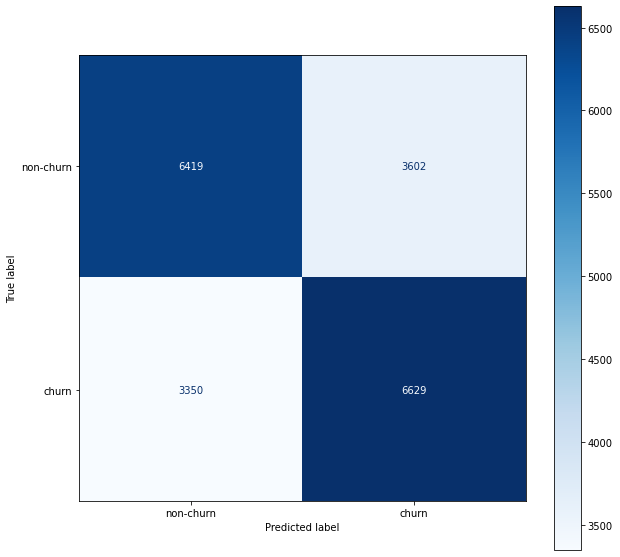

In [ ]:
eval(lgbm_best)

Лучшие метрики показывает модель lgbm. Однако с нарастанием сложности модели мы теряем ее интерпретируемость.

## Сохранение модели

In [ ]:
import pickle as pkl

In [ ]:
with open("lgbm_model.pkl", "wb") as f:
    pkl.dump(lgbm_best, f)

In [ ]:
with open('lgbm_model.pkl', 'rb') as f:
    lgbm = pkl.load(f)

In [ ]:
lgbm

LGBMClassifier(max_bin=1024, min_child_samples=5, min_child_weight=1,
               min_split_gain=0.5, num_iterations=200, num_leaves=34,
               objective='binary', scale_pos_weight=1, subsample=1,
               subsample_for_bin=200, subsample_freq=1)